#### Data comes from Kaggle https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

- StudentID - A unique identifier assigned to each student (1001 to 3392).
- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

#### Import dataset

In [3]:
df = pd.read_csv('Student_performance_data _.csv')
df = df.drop(columns=['StudentID'])
df['GradeClass'] = df['GradeClass'].astype(int)
df.rename(columns = {'ParentalEducation': 'ParentEduc', 'Volunteering': 'Volunt', 'StudyTimeWeekly': 
                     'StudyTimeWk', 'GradeClass': 'Grade', 'Extracurricular': 'Extracurr'}, inplace=True)
df

,Age,Gender,Ethnicity,ParentEduc,StudyTimeWk,Absences,Tutoring,ParentalSupport,Extracurr,Sports,Music,Volunt,GPA,Grade
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1


In [4]:
df['Grade'].value_counts() 
#there is little bit of imbalanced dataset

4    1211
3     414
2     391
1     269
0     107
Name: Grade, dtype: int64

<AxesSubplot:xlabel='StudyTimeWk', ylabel='GPA'>

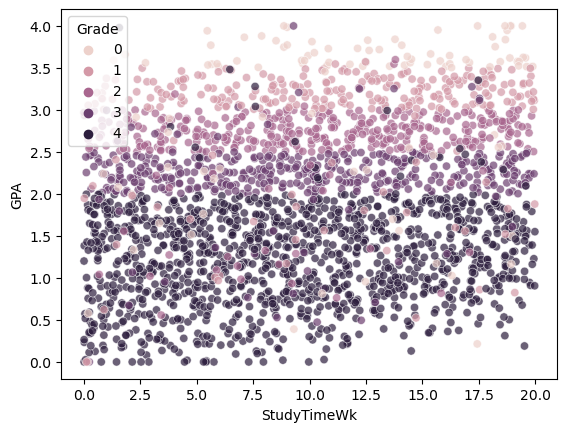

In [7]:
sns.scatterplot(data = df, x='StudyTimeWk', y='GPA', hue='Grade', alpha=0.7) 

#### Separate X features & y labels

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### SPLIT into Training & Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling (Standard Scaler)

In [10]:
from sklearn.preprocessing import StandardScaler #Always scale for KNN because it is using distance
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### TRAIN the model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  #all of these are default values anyway
model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

#### TEST the model

In [12]:
y_pred = model.predict(scaled_X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,y_test,y_pred
155,1,0
109,3,1
254,4,3
443,4,4
40,2,2


#### EVAULATE the model

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# model.coef_ ----does not involve learning a set of parameters or coefficients from the training data

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

#Darn not the best model, recall is close but precision is not. Definitely we work with imbalanced data

Accuracy Score: 0.6116910229645094
Precision Score: 0.597071274506362
Recall Score: 0.6116910229645094
F1 Score: 0.5962563189300264


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


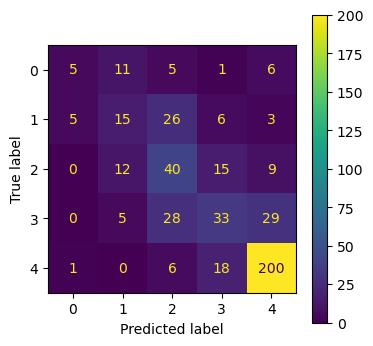

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, scaled_X_test, y_test).figure_.set_size_inches(4, 4)

In [17]:
confusion_matrix(y_test, y_pred)

array([[  5,  11,   5,   1,   6],
       [  5,  15,  26,   6,   3],
       [  0,  12,  40,  15,   9],
       [  0,   5,  28,  33,  29],
       [  1,   0,   6,  18, 200]], dtype=int64)

In [21]:
# can also predict probability for a point, not just for the class (1, or 0)
probability_data = model.predict_proba(scaled_X_test)
new_df['PercentChance0Class'] = probability_data[:, 0]
new_df['PercentChance1Class'] = probability_data[:, 1]
new_df['PercentChance2Class'] = probability_data[:, 2]
new_df['PercentChance3Class'] = probability_data[:, 3]
new_df['PercentChance4Class'] = probability_data[:, 4]



new_df

#for row 476
# there is 0% chance of belonging to class 0
# there is 0% chance of belonging to class 1
# there is 40% chance of belonging to class 2
# there is 20% chance of belonging to class 3
# there is 40% chance of belonging to class 4
# no wonder why it predicted wrong

,y_test,y_pred,PercentChance0Class,PercentChance1Class,PercentChance2Class,PercentChance3Class,PercentChance4Class
0,3,3,0.0,0.0,0.0,0.8,0.2
1,2,3,0.2,0.2,0.2,0.4,0.0
2,4,4,0.0,0.0,0.0,0.0,1.0
3,4,4,0.0,0.0,0.0,0.4,0.6
4,2,1,0.0,0.4,0.2,0.2,0.2
...,...,...,...,...,...,...,...
474,4,4,0.0,0.2,0.0,0.0,0.8
475,4,4,0.0,0.0,0.0,0.0,1.0
476,3,2,0.0,0.0,0.4,0.2,0.4
477,3,3,0.2,0.2,0.2,0.4,0.0


#### Visualize the model

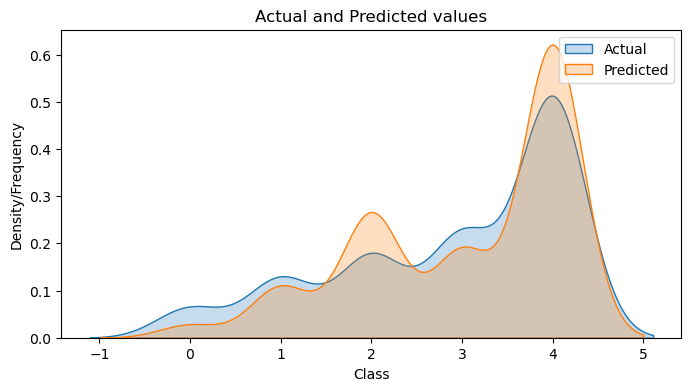

In [23]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
plt.legend()
plt.show()

# y_test & y_pred mostly overlap, but definitely noticeable difference, thus why 61% accuracy

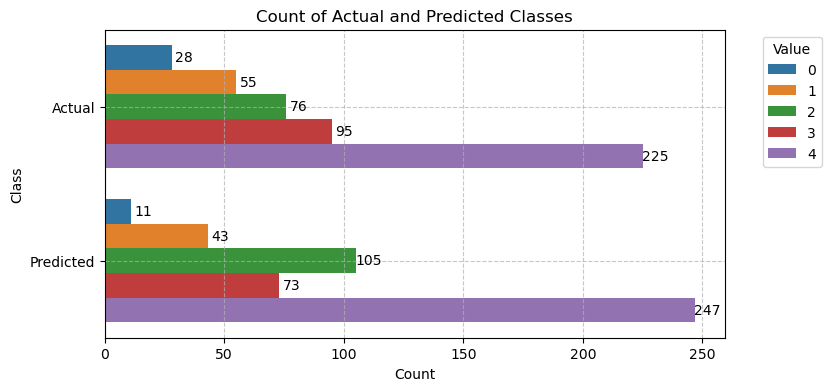

In [24]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(8, 4))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

#### Predict new student

In [25]:
print(model.predict(scaler.transform([[18, 1, 0, 0, 14, 2, 0, 0, 0, 0, 0, 0, 3.4 ]])))
# if a student is 18 years old, is female, caucasian, parents have no education, spends 14 hrs weekly studying, 2 times number of absences, 
# no tutoring, no parantal support, no extracurricular, no sports, no music, no volunteering, and has GPA of 3.2
# then she will get a class 3 which is D
print(model.predict_proba(scaler.transform([[18, 1, 0, 0, 14, 2, 0, 0, 0, 0, 0, 0, 3.4 ]])))
#the model is 0% sure that this new student belongs to class 0-A
#the model is 0% sure that this new student belongs to class 1-B
#the model is 40% sure that this new student belongs to class 2-C
#the model is 60% sure that this new student belongs to class 3-D
#the model is 0% sure that this new student belongs to class 4-F


[3]
[[0.  0.  0.4 0.6 0. ]]


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
print(model.predict(scaler.transform([[18, 1, 0, 3 , 14, 2, 0, 1, 1, 0, 0, 0, 3.0 ]])))
# if a student is 18 years old, is female, caucasian, parents have no Bachelors, spends 14 hrs weekly studying, 2 times number of absences, 
# no tutoring, low parantal support, yes to extracurricular, no sports, no music, no volunteering, and has GPA of 3.0
# then she will get an class 2 which is C
print(model.predict_proba(scaler.transform([[18, 1, 0, 3 , 14, 2, 0, 1, 1, 0, 0, 0, 3.0]])))
#the model is 31.8% sure that this new student belongs to class 1-A, and 47.1% sure that it belongs to class 2-C

[2]
[[0.  0.  0.8 0.  0.2]]


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Elbow method
Huge difference in class 2. Not a terrible model, but perhaps the Elbow method will tell us how many Ks to use

Text(0, 0.5, 'Error Rate')

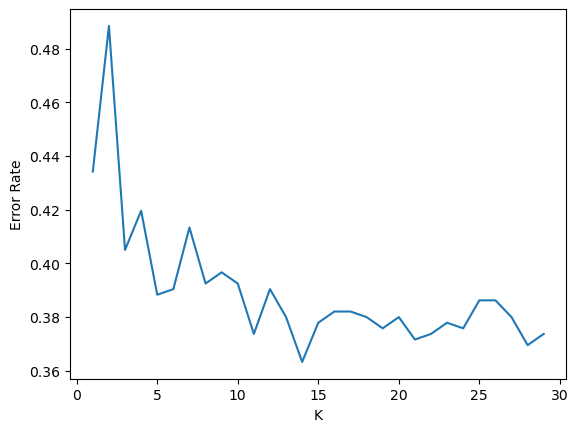

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)
    
    
#visualize the elbow method
plt.plot(range(1, 30), test_error_rates)
plt.xlabel('K')
plt.ylabel('Error Rate')

# it seems that k=14 is the number, as the rest increase the error rate

Well it says to use 14, lets try it out

#### Model 2 with K=14

In [30]:
model = KNeighborsClassifier(n_neighbors=14, metric='minkowski', p=2 )  #all of these are default values anyway
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy Score: 0.6367432150313153
Precision Score: 0.618886604486449
Recall Score: 0.6367432150313153
F1 Score: 0.5935659097347564


In [29]:
"""
Previous results
Accuracy Score: 0.6116910229645094
Precision Score: 0.597071274506362
Recall Score: 0.6116910229645094
F1 Score: 0.5962563189300264
"""

'\nPrevious results\nAccuracy Score: 0.6116910229645094\nPrecision Score: 0.597071274506362\nRecall Score: 0.6116910229645094\nF1 Score: 0.5962563189300264\n'

It did improve it by just a little bit. 